# Customer Segmentation Analysis

## Project Description:

The aim of this data analytics project is to perform customer segmentation analysis for an e-
commerce company. By analyzing customer behavior and purchase patterns, the goal is to
group customers into distinct segments. This segmentation can inform targeted marketing
strategies, improve customer satisfaction, and enhance overall business strategies.

# 1. Data Collection:
Obtain a dataset containing customer information, purchase history, and
relevant data.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings 
from warnings import filterwarnings
filterwarnings(action='ignore') 

In [2]:
# load dataset
df= pd.read_csv("E-commerce Customer Data.csv")

In [3]:
# display the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [4]:
# first five row of data
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [5]:
# check the missing values
df.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

# 2. Data Exploration and Cleaning: 
Explore the dataset, understand its structure, and handle
any missing or inconsistent data.


In [6]:
df.shape

(350, 11)

In [7]:
# Summary statistics for numeric and categorical columns
df.describe(include="all")

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
count,350.000000,350,350.000000,350,350,350.000000,350.000000,350.000000,350,350.000000,348
unique,NaN,2,NaN,6,3,NaN,NaN,NaN,2,NaN,3
top,NaN,Female,NaN,New York,Gold,NaN,NaN,NaN,True,NaN,Satisfied
freq,NaN,175,NaN,59,117,NaN,NaN,NaN,175,NaN,125
mean,275.500000,NaN,33.597143,NaN,NaN,845.381714,12.600000,4.019143,NaN,26.588571,NaN
std,101.180532,NaN,4.870882,NaN,NaN,362.058695,4.155984,0.580539,NaN,13.440813,NaN
min,101.000000,NaN,26.000000,NaN,NaN,410.800000,7.000000,3.000000,NaN,9.000000,NaN
25%,188.250000,NaN,30.000000,NaN,NaN,502.000000,9.000000,3.500000,NaN,15.000000,NaN
50%,275.500000,NaN,32.500000,NaN,NaN,775.200000,12.000000,4.100000,NaN,23.000000,NaN
75%,362.750000,NaN,37.000000,NaN,NaN,1160.600000,15.000000,4.500000,NaN,38.000000,NaN


In [8]:
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [9]:
# duplicate rows in dataset
df.duplicated().sum()

0

# 3. Descriptive Statistics:
Calculate key metrics such as average purchase value, frequency of purchases, etc.


In [10]:
# Calculate total revenue
df['Total Spend'].sum()

295883.6

In [11]:
# Calculate average purchase value
df['Total Spend'].mean()

845.3817142857142

In [12]:
# Calculate purchase frequency (number of items purchased per customer)
df.groupby('Customer ID')['Total Spend'].count()

Customer ID
101    1
102    1
103    1
104    1
105    1
      ..
446    1
447    1
448    1
449    1
450    1
Name: Total Spend, Length: 350, dtype: int64

In [13]:
# Calculate total number of unique customers
df['Customer ID'].nunique()

350

In [14]:
# Display top 5 customers by total spend
purchase_per_customer = df.groupby('Customer ID')['Total Spend'].sum()
print(purchase_per_customer.sort_values(ascending=False).head())


Customer ID
110    1520.1
128    1500.1
218    1500.1
331    1500.1
188    1500.1
Name: Total Spend, dtype: float64


# 4. Customer Segmentation:
Utilize clustering algorithms (e.g., K-means) to segment customers based on behavior and purchase patterns.

In [15]:
# import Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#### Step 1: Data Preparation for Clustering

In [16]:
# Select relevant features for clustering
features = df[['Total Spend', 'Items Purchased', 'Days Since Last Purchase']]

# Handle missing values (if any)
features = features.dropna()

In [17]:
# Standardize the features (important for K-means clustering)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [18]:
print("Data Preparation Complete. Sample of Scaled Features:")
print(scaled_features[:5])  # Display first 5 rows of scaled data


Data Preparation Complete. Sample of Scaled Features:
[[ 0.76013014  0.3373459  -0.11835933]
 [-0.17945875 -0.38553817 -0.63990676]
 [-0.92557033 -0.86746089  1.14825585]
 [ 1.75614415  1.54215268 -1.08694741]
 [-0.34569158  0.09638454  2.11684392]]


#### Step 2: Elbow Method to Determine Optimal Clusters

In [19]:
# Elbow method to determine the optimal number of clusters

wcss = []  # List to store Within-Cluster Sum of Squares
for i in range(1, 11):  # Trying between 1 and 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)



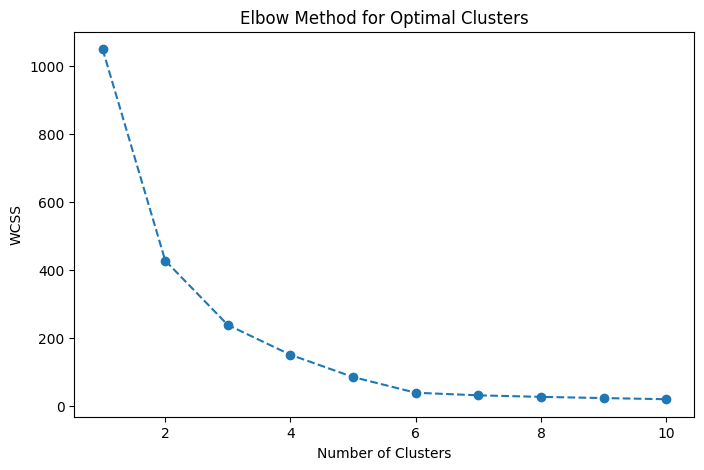

In [20]:
# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


#### Step 3: Apply K-means Clustering

In [21]:
# Apply K-means with the optimal number of clusters (e.g., 3 clusters based on the elbow plot)
optimal_clusters = 3  # Replace this with the number from the elbow method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)


In [22]:
# Add the cluster labels to the dataset
df['Cluster'] = clusters


In [23]:
# View the segmented data
print("\nSegmented Customer Data:")
print(df[['Customer ID', 'Total Spend', 'Items Purchased', 'Days Since Last Purchase', 'Cluster']].head())



Segmented Customer Data:
   Customer ID  Total Spend  Items Purchased  Days Since Last Purchase  \
0          101      1120.20               14                        25   
1          102       780.50               11                        18   
2          103       510.75                9                        42   
3          104      1480.30               19                        12   
4          105       720.40               13                        55   

   Cluster  
0        2  
1        1  
2        0  
3        2  
4        0  


#### Step 4: Analyze Cluster Centers

In [24]:
# Retrieve and display the cluster centers (unscaled)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("\nCluster Centers (Unscaled):")
print(cluster_centers)



Cluster Centers (Unscaled):
[[ 593.9025641    10.4957265    42.88888889]
 [ 629.25086207    9.6637931    18.87068966]
 [1311.14444444   17.61538462   17.94017094]]


# 5. Visualization:
Create visualizations (e.g., scatter plots, bar charts) to illustrate customer segments.

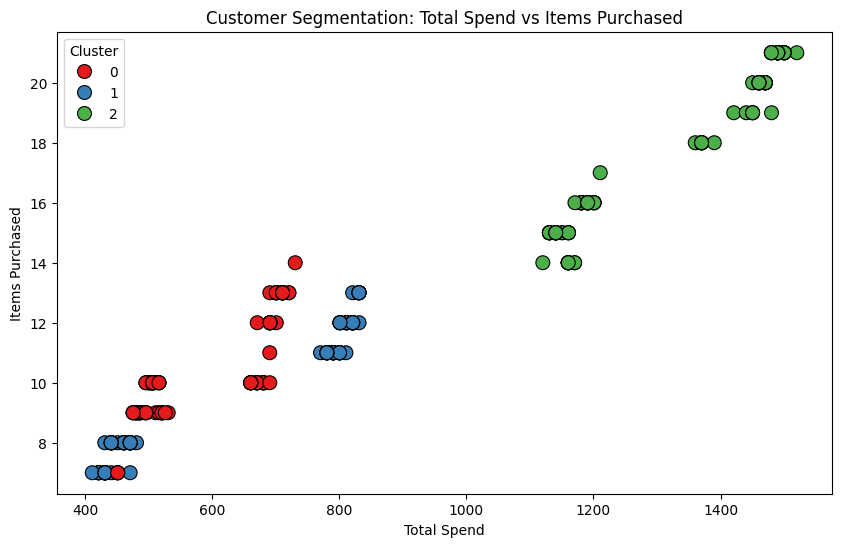

In [25]:
# Visualize customer segments using scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot for 'Total Spend' vs 'Items Purchased' colored by cluster
sns.scatterplot(x=df['Total Spend'], y=df['Items Purchased'], hue=df['Cluster'], palette='Set1', s=100, edgecolor='black')

plt.title('Customer Segmentation: Total Spend vs Items Purchased')
plt.xlabel('Total Spend')
plt.ylabel('Items Purchased')
plt.legend(title='Cluster')
plt.show()


#### Plot bar charts for each cluster to compare key metrics


In [26]:
cluster_means = df.groupby('Cluster')[['Total Spend', 'Items Purchased', 'Days Since Last Purchase']].mean()


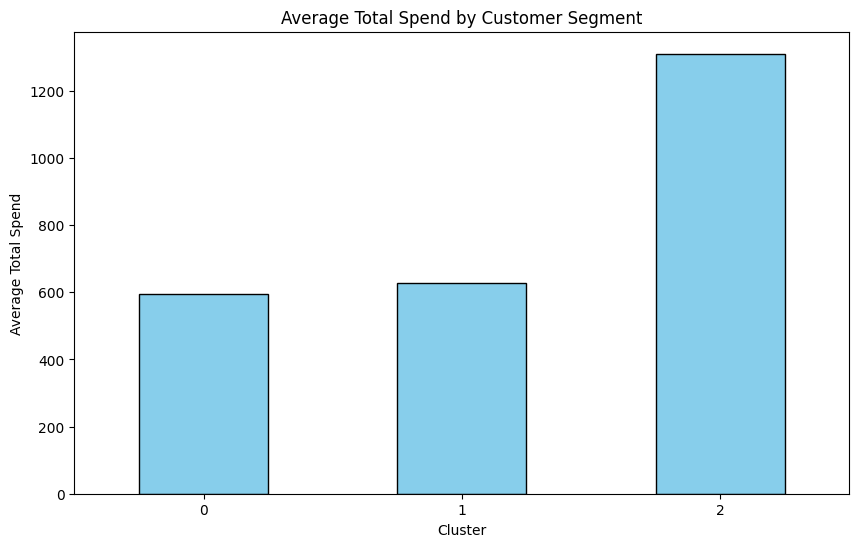

In [27]:
# Plot Total Spend by Cluster
plt.figure(figsize=(10, 6))
cluster_means['Total Spend'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Total Spend by Customer Segment')
plt.xlabel('Cluster')
plt.ylabel('Average Total Spend')
plt.xticks(rotation=0)
plt.show()

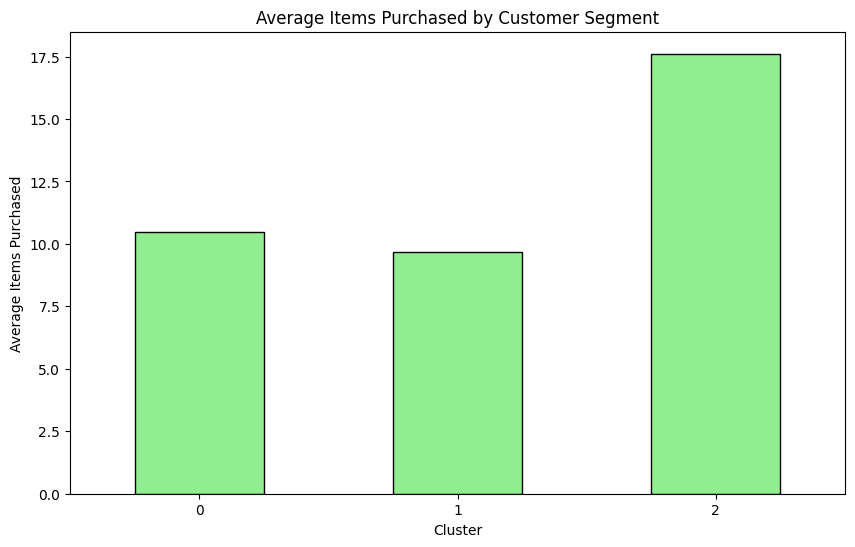

In [28]:
# Plot Items Purchased by Cluster
plt.figure(figsize=(10, 6))
cluster_means['Items Purchased'].plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Average Items Purchased by Customer Segment')
plt.xlabel('Cluster')
plt.ylabel('Average Items Purchased')
plt.xticks(rotation=0)
plt.show()

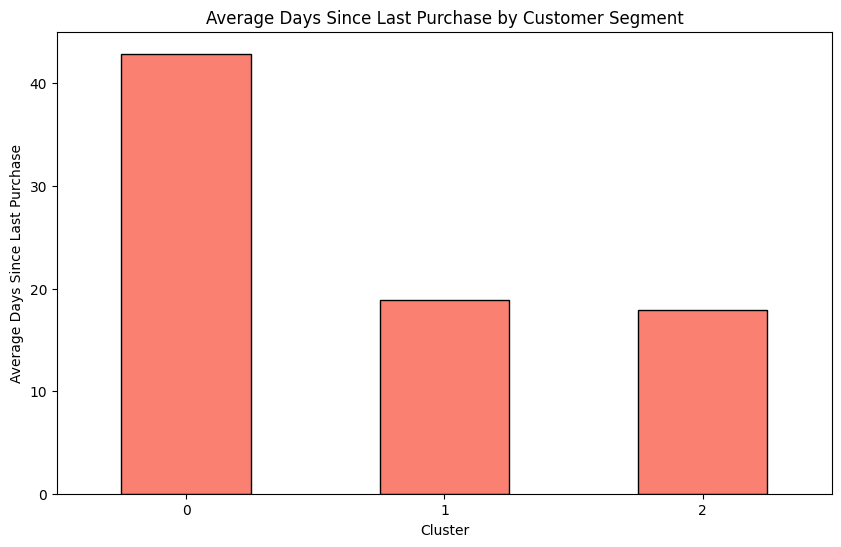

In [29]:
# Plot Days Since Last Purchase by Cluster
plt.figure(figsize=(10, 6))
cluster_means['Days Since Last Purchase'].plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Average Days Since Last Purchase by Customer Segment')
plt.xlabel('Cluster')
plt.ylabel('Average Days Since Last Purchase')
plt.xticks(rotation=0)
plt.show()


# 6. Insights and Recommendations:
Analyze characteristics of each segment and provideinsights.

### Step 1: Understand Cluster Characteristics
Calculate the average values of key metrics for each cluster to summarize their behavior.

In [30]:
# Calculate average metrics for each cluster
df.groupby('Cluster')[['Total Spend', 'Items Purchased', 'Days Since Last Purchase']].mean()




,Total Spend,Items Purchased,Days Since Last Purchase
Cluster,,,
0,593.902564,10.495726,42.888889
1,629.250862,9.663793,18.870690
2,1311.144444,17.615385,17.940171


### Step 2: Interpret Each Cluster
Use the summary table to understand the defining characteristics of each cluster:

Example Interpretation:

##### Cluster 0: Low Spenders 

Low Spend: $593.902564

Purchase Frequency: Moderate

Last Purchase: 42.88 days ago

##### Cluster 1: Moderate Spenders 

Average Spend: $629.250862

Purchase Frequency: Low

Last Purchase: 18.87 days ago

##### Cluster 2: High-Value Customers 

High Spend: $1311.144444

Purchase Frequency: High

Last Purchase: 17.94 days ago


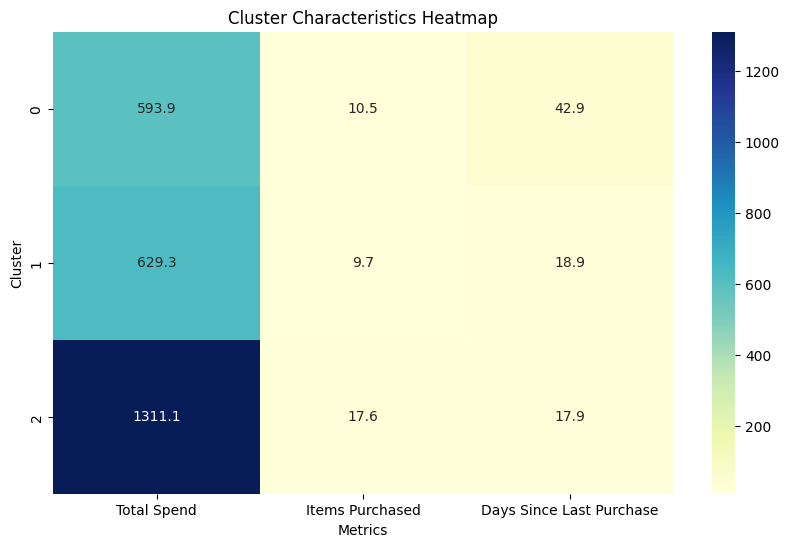

In [31]:
# Visualize the cluster characteristics
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, fmt=".1f", cmap="YlGnBu", cbar=True)
plt.title('Cluster Characteristics Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Cluster')
plt.show()
